In [24]:
import numpy as np
import computing, results_annalysis
import instance_genrerantion

## Création de l'instance

#### Génération d'une instance par réduction

In [25]:
from problem_reductions.npp_to_ising import *
# NPP instance
weights = [1, 2, 3, 4]

# Ising instance
J, H = npp_to_ising(weights=weights)

#### Ou génération d'un instance aléatoire

In [26]:
instance_size = 100
J, H = instance_genrerantion.generate_instance(size=instance_size)
H = -1*J[1, :]
J = np.zeros(J.shape)

## Nouveau: Choix des fonctions `temperature`, `a` et `pas` personalisées

Pour expérimenter plus vite

In [27]:
def temperature(self, t):
    tau = n_itterations/1
    # temp = 10*(1-np.exp(-1/tau*(t-1)))
    temp = 0.1*np.log(100*t)
    return 0
    # r = np.random.randint(0, 2)*2-1
    # return temp

n_itterations=600

def a(self, t):
    a0=0
    return 0
    if t<70:
        return -0.1
    else:
        return 0.2

def step_func(self, t):
    # return 1.01-np.exp(-0.01*(t-1))
    # return 1/t
    return 0.01

In [28]:
step_func(1, 41)

0.01

## Simulation avec des paramètres choisis

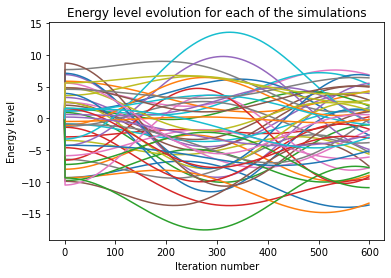

-17.574293414788862

In [29]:
J2 = J * 1
states, energies, path = computing.compute_single_instance(instance_size=instance_size, step=step_func, n_itterations=n_itterations, n_cond_init=50, J=J2, H=H, savetofile=False, temperature=temperature, a=a)
results_annalysis.plot_energies_evolution(energies)
results_annalysis.extract_full_solution(states, energies)[0]

In [18]:
states.shape

(50, 100, 600, 2)

In [22]:
pos = states[:, :, 599, 0]

In [23]:
pos

array([[ 1.03560505,  1.        , -0.58523451, ...,  1.00494365,
        -1.01939202,  1.03931574],
       [-1.03560505,  1.        ,  0.58523451, ..., -1.00494365,
        -1.01939202, -1.03931574],
       [-1.03560505, -1.        , -0.58523451, ...,  1.00494365,
        -1.01939202,  1.03931574],
       ...,
       [ 1.03560505, -1.        ,  0.58523451, ..., -1.00494365,
         1.01939202,  1.03931574],
       [ 1.03560505, -1.        , -0.58523451, ...,  1.00494365,
         1.01939202,  1.03931574],
       [-1.03560505, -1.        ,  0.58523451, ...,  1.00494365,
        -1.01939202,  1.03931574]])

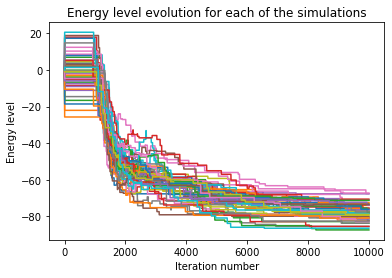

In [28]:
J2 = J * 0.1
states, energies, path = computing.compute_single_instance(instance_size=instance_size, step=step_func, n_itterations=10000, n_cond_init=50, J=J2, H=H, savetofile=False)
results_annalysis.plot_energies_evolution(energies)

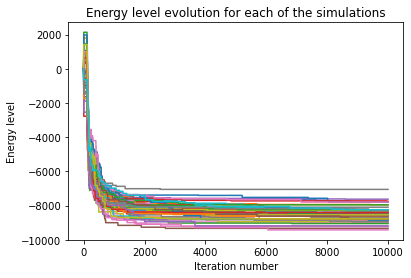

In [37]:
J2 = J * 10
states, energies, path = computing.compute_single_instance(instance_size=instance_size, step=step_func, n_itterations=10000, n_cond_init=50, J=J2, H=H, savetofile=False)
results_annalysis.plot_energies_evolution(energies[:, :])

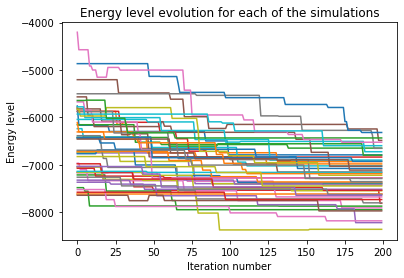

In [42]:
results_annalysis.plot_energies_evolution(energies[:, :])

On a directement accès aux résultats et aussi aux chemin d'accès du fichier contenant l'instance, les paramètres ou les résultats si on veut y avoir accès plus tard

## Interprétation des résultats

#### On peut aller les chercher a partir du filename (si besoin)

(Mais ici on les as direct récupéré en sortie de `compute_single_instance`)

In [10]:
# states, energies = results_annalysis.open_results(path)

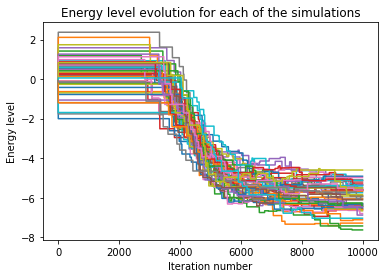

In [25]:
results_annalysis.plot_energies_evolution(energies[:, :])

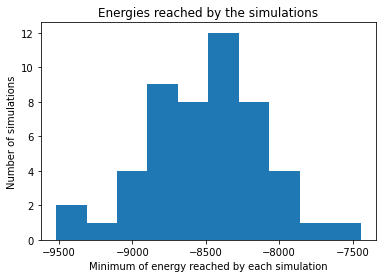

In [30]:
results_annalysis.plot_energies_hist(energies)

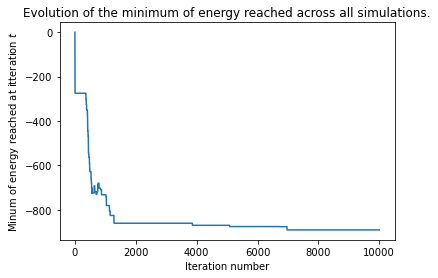

In [13]:
results_annalysis.plot_min_energy_evolution(energies)